In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()  

X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=5)

# # Run cross-validation, splits the dataset into 10 parts #
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print('mean score =',scores.mean())
print('score =',scores)


mean score = 0.9666666666666668
score = [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
import numpy as np
neighbors_settings = list(range(1,31))
k_scores = []

for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(score.mean())
    
print('score =', k_scores)
print('mean score =', np.mean(k_scores))

score = [np.float64(0.96), np.float64(0.9533333333333334), np.float64(0.9666666666666666), np.float64(0.9666666666666666), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9666666666666666), np.float64(0.9666666666666666), np.float64(0.9733333333333334), np.float64(0.96), np.float64(0.9666666666666666), np.float64(0.96), np.float64(0.9666666666666666), np.float64(0.9533333333333334), np.float64(0.9533333333333334), np.float64(0.9533333333333334)]
mean score = 0.9673333333333332


In [11]:
# # manual, no need to use it #
from sklearn.metrics import accuracy_score

k_scores_manual = []

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for k in neighbors_settings:
    accuracies = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    
    k_scores_manual.append(np.mean(accuracies))

print('score manual =', k_scores_manual)
print('mean score manual =', np.mean(k_scores_manual))

score manual = [np.float64(0.9533333333333335), np.float64(0.9466666666666669), np.float64(0.9666666666666668), np.float64(0.9533333333333335), np.float64(0.9600000000000002), np.float64(0.9533333333333335), np.float64(0.9533333333333335), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9600000000000002), np.float64(0.9666666666666668), np.float64(0.96), np.float64(0.9666666666666666), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.96), np.float64(0.9666666666666668), np.float64(0.9600000000000002), np.float64(0.9600000000000002), np.float64(0.9533333333333335), np.float64(0.9600000000000002), np.float64(0.9533333333333334), np.float64(0.9600000000000002), np.float64(0.9533333333333334), np.float64(0.9533333333333334), np.float64(0.9333333333333333), np.float64(0.9333333333333333), np.float64(0.9333333333333333), np.float64(0.9333333333333333), np.float64(0.9333333333333333)]
mean score manual = 0.9560000000000001


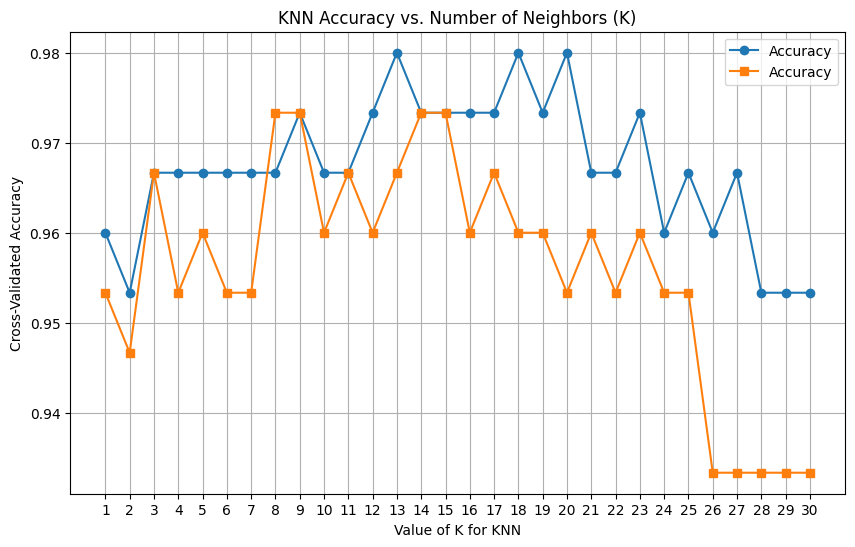

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, k_scores, marker='o', linestyle='-', label='Accuracy')
plt.plot(neighbors_settings, k_scores_manual, marker='s', linestyle='-', label='Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title("KNN Accuracy vs. Number of Neighbors (K)")
plt.grid(True) 
plt.xticks(neighbors_settings)
plt.legend()
plt.show()

In [13]:
# # from plot, take 20 #
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

pipeline = make_pipeline(StandardScaler(), LogisticRegression())
score = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy').mean()
print(score)


0.9600000000000002
